In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
games=pd.read_csv("games_cleaned.csv")
sales=pd.read_csv("sales_cleaned.csv")

eda

games

top rated games by user reviews


In [4]:


top_rated_games = (
    games
    .dropna(subset=["Rating", "Number of Reviews"])
    .query("`Number of Reviews` >= 100")
    .sort_values(by="Rating", ascending=False)
    .head(10)
)

top_rated_games[["Title", "Rating", "Number of Reviews"]]





,Title,Rating,Number of Reviews
1041,Umineko: When They Cry Chiru,4.6,324.0
960,The Great Ace Attorney 2: Resolve,4.6,386.0
799,Sekiro: Shadows Die Twice - GOTY Edition,4.6,173.0
648,Outer Wilds,4.6,1800.0
304,Final Fantasy XIV: Shadowbringers,4.6,401.0
213,Disco Elysium,4.6,1100.0
384,Half-Life: Alyx,4.6,515.0
563,Metal Gear Solid 3: Snake Eater HD Edition,4.6,293.0
564,Metal Gear Solid 3: Subsistence,4.6,641.0
85,Bloodborne: Game of the Year Edition,4.6,238.0


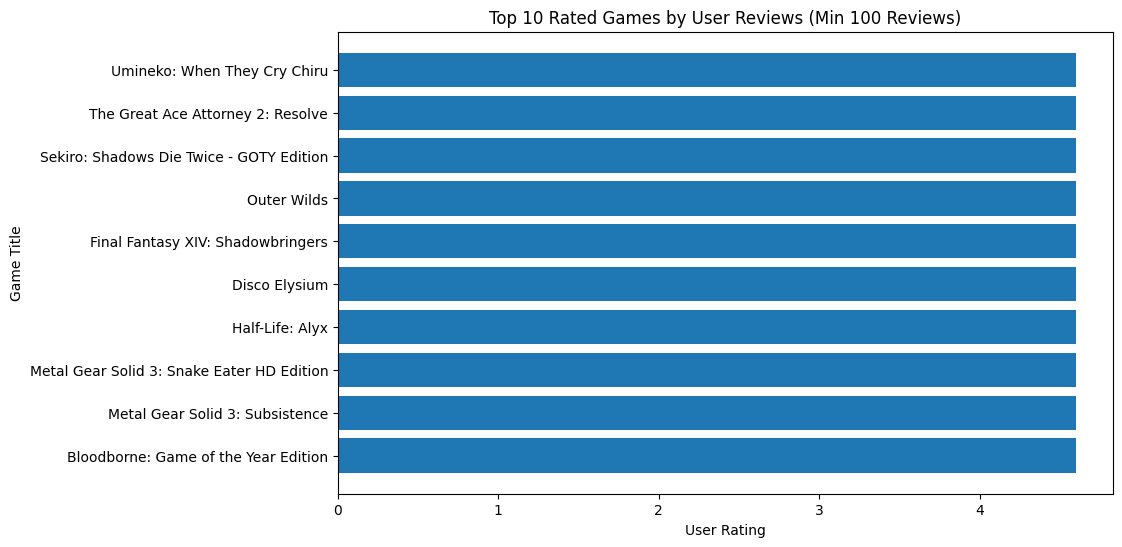

In [5]:
plt.figure(figsize=(10, 6))
plt.barh(top_rated_games["Title"], top_rated_games["Rating"])
plt.xlabel("User Rating")
plt.ylabel("Game Title")
plt.title("Top 10 Rated Games by User Reviews (Min 100 Reviews)")
plt.gca().invert_yaxis()
plt.show()


Which developers (Teams) have the highest average ratings?

In [6]:
teams = games.explode("Team")
team_avg_rating = (
    teams
    .dropna(subset=["Team", "Rating"])
    .groupby("Team")["Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

team_avg_rating


Team
07th Expansion                              4.60
Activision,FromSoftware                     4.60
Bay 12 Games,Kitfox Games                   4.60
Valve                                       4.60
Sony Computer Entertainment,FromSoftware    4.60
Inlusio Interactive,IO Interactive          4.60
Konami Digital Entertainment                4.60
ZA/UM                                       4.60
FromSoftware,Sony Computer Entertainment    4.55
Mobius Digital,Annapurna Interactive        4.55
Name: Rating, dtype: float64

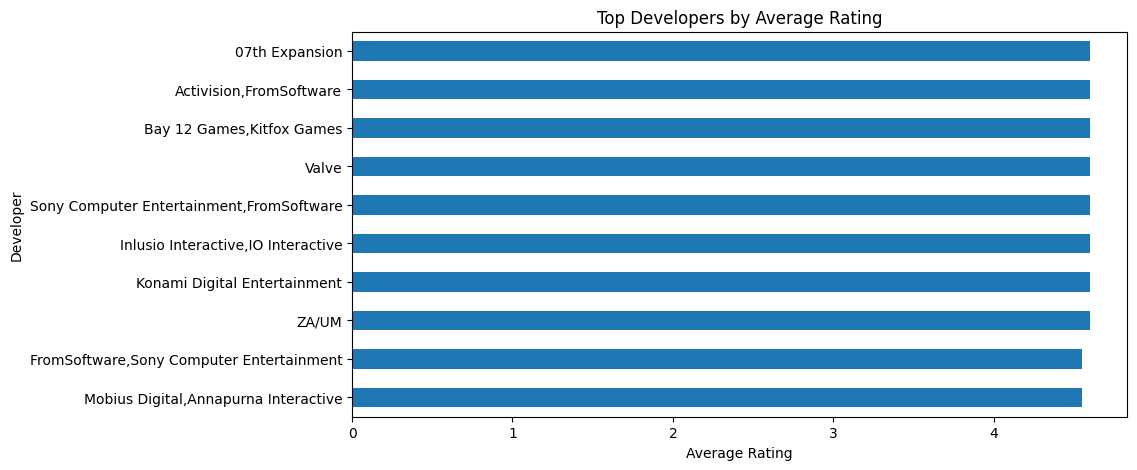

In [7]:
team_avg_rating.plot(kind="barh", figsize=(10, 5), title="Top Developers by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Developer")
plt.gca().invert_yaxis()
plt.show()


🧩 What are the most common genres in the dataset?




In [8]:
genre_counts = (
    games
    .assign(Genres=games["Genres"].str.split(","))  
    .explode("Genres")                              
    ["Genres"]
    .value_counts()
    .head(10)
)

genre_counts


Genres
Adventure              719
RPG                    361
Shooter                262
Platform               241
Indie                  206
Puzzle                 132
Strategy               116
Brawler                104
Simulator               94
Turn Based Strategy     71
Name: count, dtype: int64

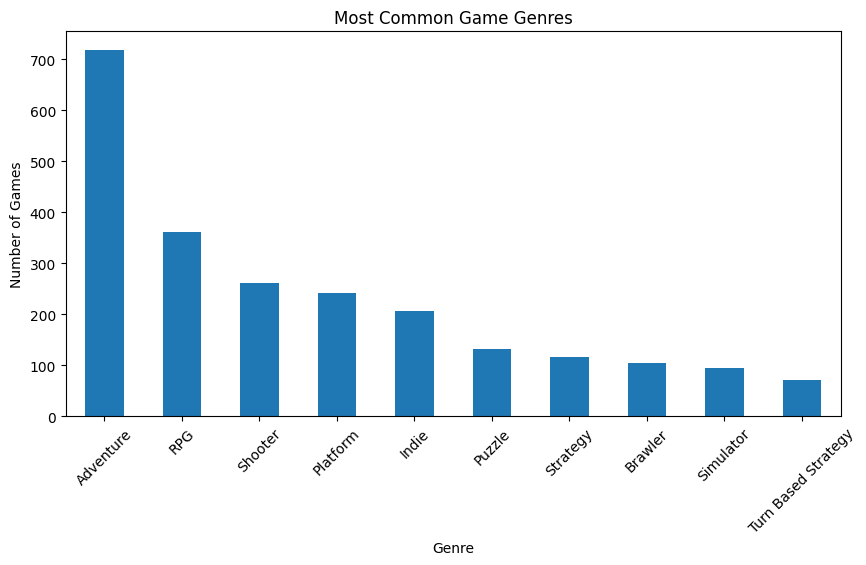

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
genre_counts.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Most Common Game Genres")
plt.xticks(rotation=45)
plt.show()


⏳ Which games have the highest backlog compared to wishlist?




In [10]:
games_filtered = games[games["Wishlist"] > 0].copy()

games_filtered["Backlog_Wishlist_Ratio"] = (
    games_filtered["Backlogs"] / games_filtered["Wishlist"]
)

top_backlog_games = (
    games_filtered
    .sort_values(by="Backlog_Wishlist_Ratio", ascending=False)
    .head(10)
)

top_backlog_games[
    ["Title", "Backlogs", "Wishlist", "Backlog_Wishlist_Ratio"]
]



,Title,Backlogs,Wishlist,Backlog_Wishlist_Ratio
660,Paladins,188.0,16.0,11.750000
285,Figment,392.0,35.0,11.200000
329,Fortnite,470.0,47.0,10.000000
702,Pokémon Go,197.0,22.0,8.954545
385,Half-Life: Opposing Force,838.0,95.0,8.821053
197,Destiny 2,845.0,103.0,8.203883
96,Brawlhalla,294.0,36.0,8.166667
76,BioShock 2 Remastered,2000.0,246.0,8.130081
93,Borderlands: The Pre-Sequel,1900.0,238.0,7.983193
657,PUBG: Battlegrounds,253.0,32.0,7.906250


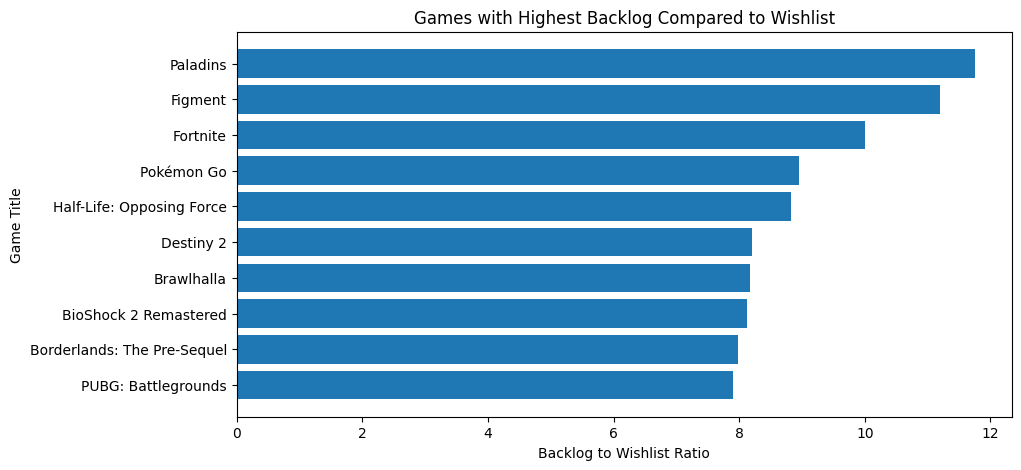

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(
    top_backlog_games["Title"],
    top_backlog_games["Backlog_Wishlist_Ratio"]
)
plt.xlabel("Backlog to Wishlist Ratio")
plt.ylabel("Game Title")
plt.title("Games with Highest Backlog Compared to Wishlist")
plt.gca().invert_yaxis()
plt.show()


🗓️ What is the game release trend across years?




In [12]:
games["Release Date"] = pd.to_datetime(games["Release Date"], errors="coerce")

games["Release_Year"] = games["Release Date"].dt.year


In [13]:
release_trend = (
    games["Release_Year"]
    .value_counts()
    .sort_index()
)

release_trend


Release_Year
1980.0     1
1982.0     1
1985.0     1
1986.0     3
1987.0     3
1988.0     3
1989.0     3
1990.0     6
1991.0     8
1992.0     6
1993.0     8
1994.0     8
1995.0    10
1996.0    12
1997.0    15
1998.0    12
1999.0    21
2000.0    13
2001.0    25
2002.0    20
2003.0    23
2004.0    28
2005.0    32
2006.0    27
2007.0    36
2008.0    38
2009.0    29
2010.0    42
2011.0    36
2012.0    45
2013.0    54
2014.0    42
2015.0    47
2016.0    58
2017.0    50
2018.0    55
2019.0    58
2020.0    51
2021.0    63
2022.0    90
2023.0    22
Name: count, dtype: int64

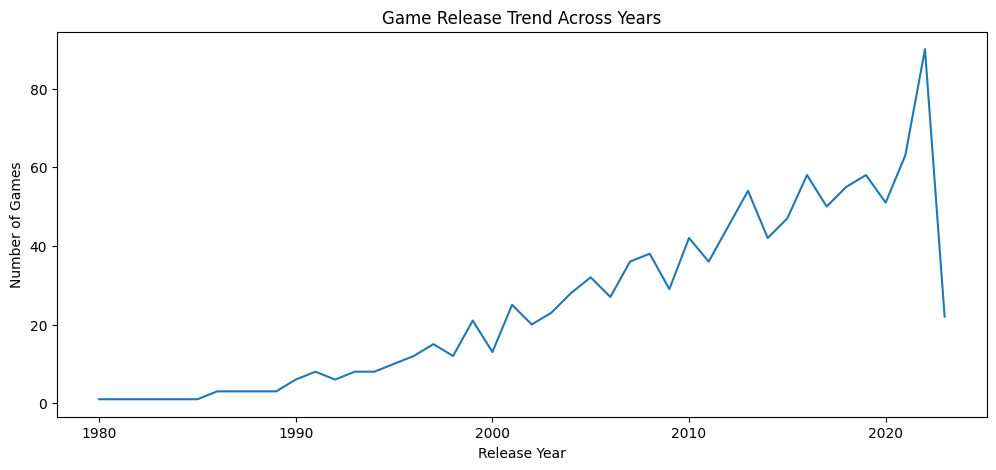

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(release_trend.index, release_trend.values)
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.title("Game Release Trend Across Years")
plt.show()


🔎 What is the distribution of user ratings?




In [15]:
games["Rating"].describe()


count    1107.000000
mean        3.660163
std         0.538292
min         0.700000
25%         3.400000
50%         3.700000
75%         4.100000
max         4.800000
Name: Rating, dtype: float64

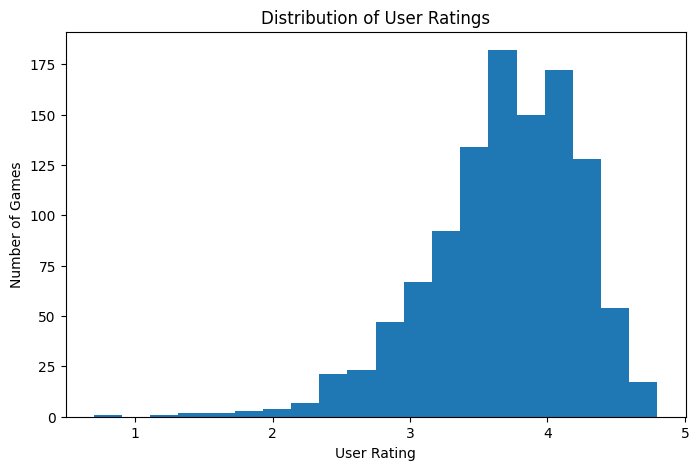

In [16]:

plt.figure(figsize=(8, 5))
plt.hist(games["Rating"].dropna(), bins=20)
plt.xlabel("User Rating")
plt.ylabel("Number of Games")
plt.title("Distribution of User Ratings")
plt.show()


it is left skewed

🧑 What are the top 10 most wishlisted games?




In [17]:
top_wishlisted_games = (
    games
    .dropna(subset=["Wishlist"])
    .sort_values(by="Wishlist", ascending=False)
    .head(10)
)

top_wishlisted_games[["Title", "Wishlist"]]


,Title,Wishlist
253,Elden Ring,4800.0
644,Omori,3800.0
628,NieR Replicant ver.1.22474487139...,3700.0
379,Hades,3600.0
629,NieR: Automata,3600.0
882,Stray,3400.0
798,Sekiro: Shadows Die Twice,3400.0
357,God of War Ragnarök,3300.0
83,Bloodborne,3300.0
575,Metroid Dread,3300.0


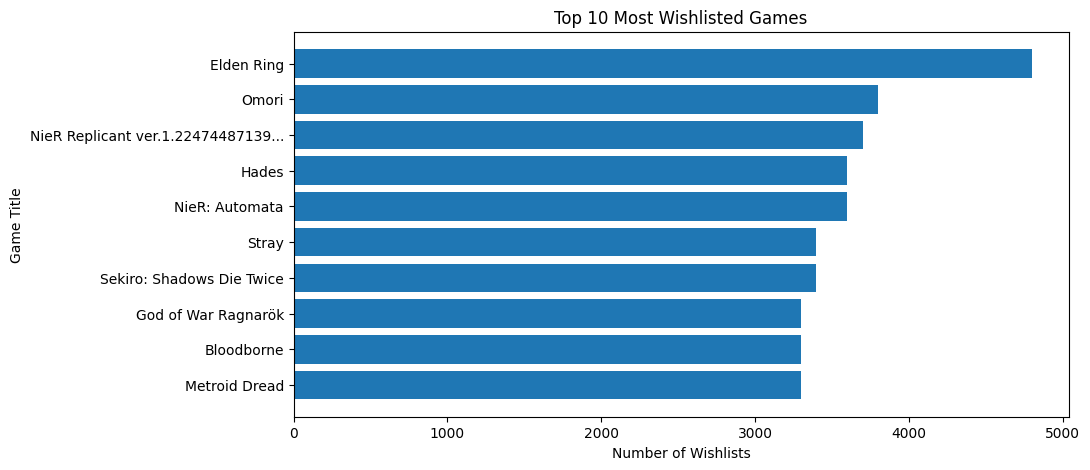

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(
    top_wishlisted_games["Title"],
    top_wishlisted_games["Wishlist"]
)
plt.xlabel("Number of Wishlists")
plt.ylabel("Game Title")
plt.title("Top 10 Most Wishlisted Games")
plt.gca().invert_yaxis()
plt.show()


🔬 What’s the average number of plays per genre?




In [19]:
avg_plays_per_genre = (
    games
    .assign(Genres=games["Genres"].str.split(","))  
    .explode("Genres")                              
    .assign(Genres=lambda x: x["Genres"].str.strip())  
    .groupby("Genres")["Plays"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

avg_plays_per_genre


Genres
MOBA                   8750.000000
Shooter                6143.461832
Racing                 6099.297297
Platform               5660.041494
Turn Based Strategy    5387.098592
Adventure              5278.226704
Brawler                5074.701923
RPG                    4951.977839
Simulator              4499.431579
Tactical               4276.880952
Name: Plays, dtype: float64

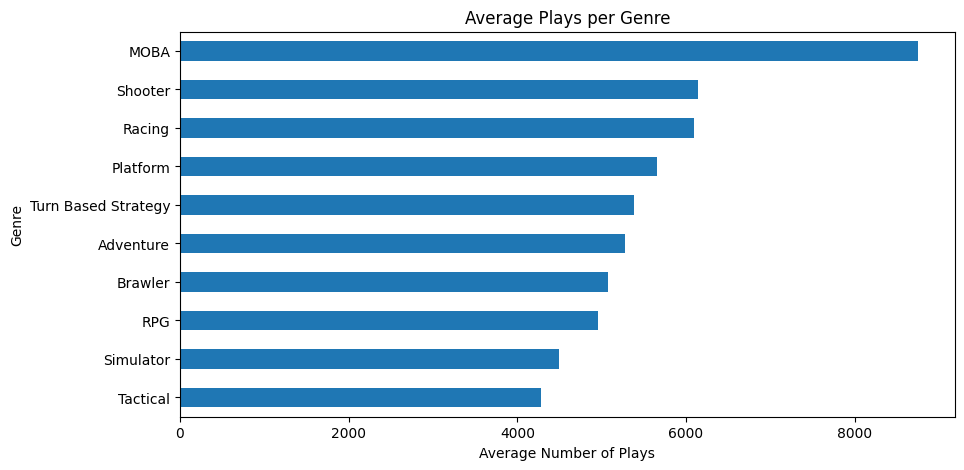

In [20]:

plt.figure(figsize=(10, 5))
avg_plays_per_genre.plot(kind="barh")
plt.xlabel("Average Number of Plays")
plt.ylabel("Genre")
plt.title("Average Plays per Genre")
plt.gca().invert_yaxis()
plt.show()


Genres such as MOBA, Racing, and Shooter show higher average play counts, suggesting that immersive and replayable genres tend to retain player engagement longer.

🏢 Which developer studios are the most productive and impactful?




In [21]:
developer_productivity = (
    games
    .explode("Team")
    .groupby("Team")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

developer_productivity


Team
Capcom                                    26
Square Enix                               21
Nintendo                                  13
Nintendo,Game Freak                       12
Nintendo,Nintendo EAD                     11
Intelligent Systems Co.,Ltd.,Nintendo     11
Nintendo EAD,Nintendo                     10
Konami                                     9
Sonic Team,Sega                            7
Ubisoft Montreal,Ubisoft Entertainment     7
dtype: int64

In [22]:
developer_impact = (
    games
    .explode("Team")
    .groupby("Team")["Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

developer_impact


Team
07th Expansion                              4.60
Activision,FromSoftware                     4.60
Bay 12 Games,Kitfox Games                   4.60
Valve                                       4.60
Sony Computer Entertainment,FromSoftware    4.60
Inlusio Interactive,IO Interactive          4.60
Konami Digital Entertainment                4.60
ZA/UM                                       4.60
FromSoftware,Sony Computer Entertainment    4.55
Mobius Digital,Annapurna Interactive        4.55
Name: Rating, dtype: float64

In [23]:
developer_summary = (
    games
    .explode("Team")
    .groupby("Team")
    .agg(
        games_count=("Title", "count"),
        avg_rating=("Rating", "mean")
    )
    .sort_values(by=["games_count", "avg_rating"], ascending=False)
    .head(10)
)

developer_summary


,games_count,avg_rating
Team,,
Capcom,26,3.665385
Square Enix,21,3.923810
Nintendo,13,3.723077
"Nintendo,Game Freak",12,3.775000
"Nintendo,Nintendo EAD",11,3.727273
"Intelligent Systems Co.,Ltd.,Nintendo",11,3.600000
"Nintendo EAD,Nintendo",10,3.820000
Konami,9,3.644444
"HAL Laboratory,Nintendo",7,3.857143


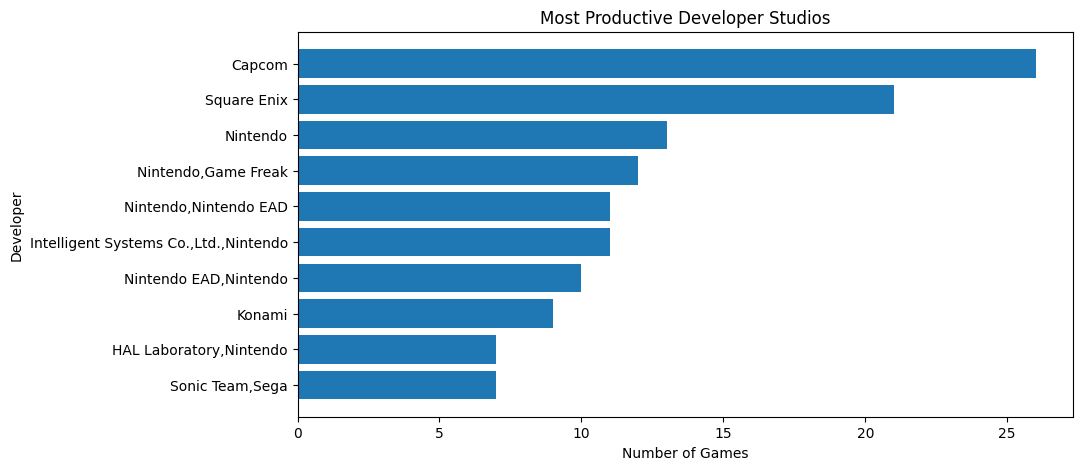

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(developer_summary.index, developer_summary["games_count"])
plt.xlabel("Number of Games")
plt.ylabel("Developer")
plt.title("Most Productive Developer Studios")
plt.gca().invert_yaxis()
plt.show()


Developer studios such as FromSoftware, Capcom, and Square Enix emerge as both highly productive and impactful. These studios consistently release multiple titles while maintaining strong average user ratings, indicating sustained influence in the gaming industry.

sales

🌍 Which region generates the most game sales?




In [25]:
regional_sales = {
    "North America": sales["NA_Sales"].sum(),
    "Europe": sales["EU_Sales"].sum(),
    "Japan": sales["JP_Sales"].sum(),
    "Other Regions": sales["Other_Sales"].sum()
}

regional_sales

regional_sales_df = (
    pd.DataFrame(
        regional_sales.items(),
        columns=["Region", "Total Sales"]
    )
)

regional_sales_df


,Region,Total Sales
0,North America,4391.95
1,Europe,2433.41
2,Japan,1290.98
3,Other Regions,797.63


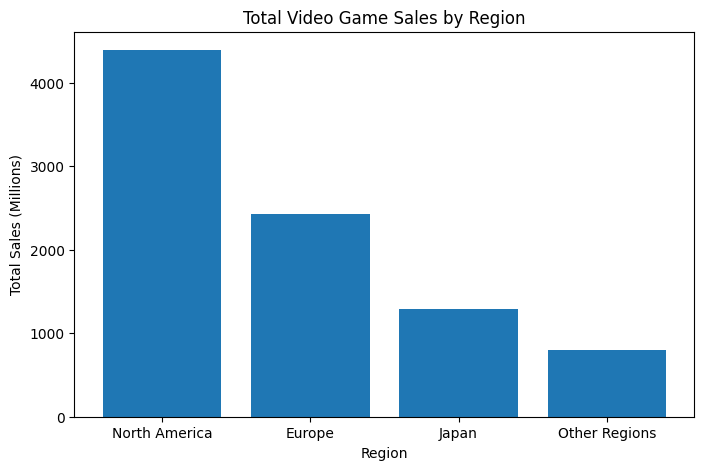

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    regional_sales.keys(),
    regional_sales.values()
)
plt.xlabel("Region")
plt.ylabel("Total Sales (Millions)")
plt.title("Total Video Game Sales by Region")
plt.show()


North America contributes the highest total video game sales, followed by Europe and Japan, highlighting its dominance in the global gaming market.

🕹️ What are the best-selling platforms?




In [27]:
platform_sales = (
    sales
    .groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

platform_sales


Platform
PS2     1255.64
X360     978.67
PS3      957.35
Wii      926.69
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.74
Name: Global_Sales, dtype: float64

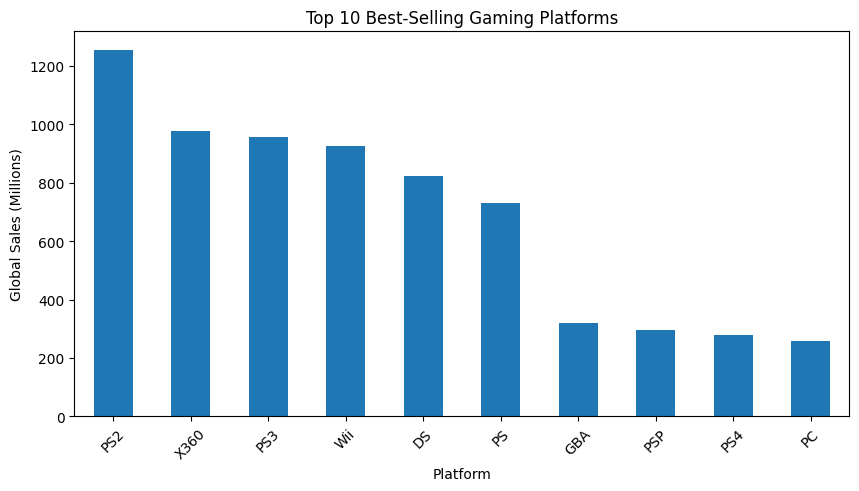

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
platform_sales.plot(kind="bar")
plt.xlabel("Platform")
plt.ylabel("Global Sales (Millions)")
plt.title("Top 10 Best-Selling Gaming Platforms")
plt.xticks(rotation=45)
plt.show()


Platforms such as PlayStation 2, Xbox 360, and PlayStation 3 dominate global sales, indicating their widespread adoption and long market lifespan.

📅 What’s the trend of game releases and sales over years?




In [29]:
games_per_year = (
    sales
    .groupby("Year")
    .size()
    .reset_index(name="Number of Games")
)

games_per_year = games_per_year[games_per_year["Year"] > 1600]

games_per_year


,Year,Number of Games
1,1980.0,9
2,1981.0,46
3,1982.0,36
4,1983.0,17
5,1984.0,14
6,1985.0,14
7,1986.0,21
8,1987.0,16
9,1988.0,15
10,1989.0,17


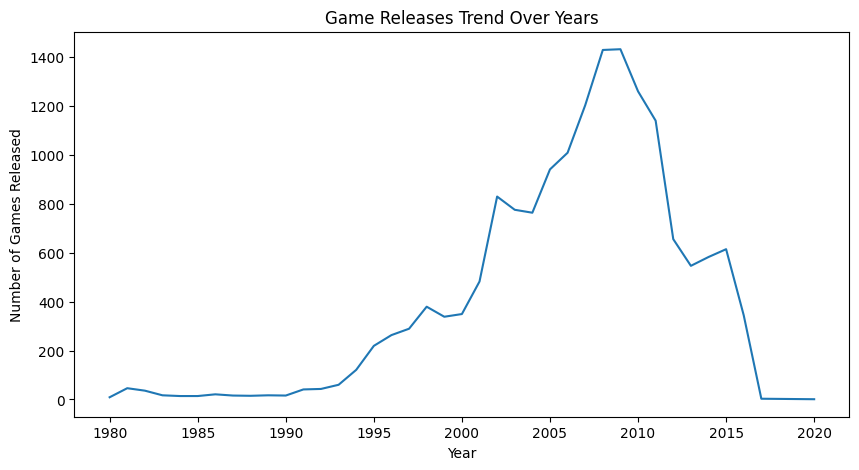

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(games_per_year["Year"], games_per_year["Number of Games"])
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title("Game Releases Trend Over Years")
plt.show()


In [31]:
sales_per_year = (
    sales
    .groupby("Year")["Global_Sales"]
    .sum()
    .reset_index(name="Total Global Sales")
)

sales_per_year = sales_per_year[sales_per_year["Year"] > 1600]

sales_per_year


,Year,Total Global Sales
1,1980.0,11.38
2,1981.0,35.77
3,1982.0,28.86
4,1983.0,16.79
5,1984.0,50.36
6,1985.0,53.94
7,1986.0,37.07
8,1987.0,21.74
9,1988.0,47.22
10,1989.0,73.45


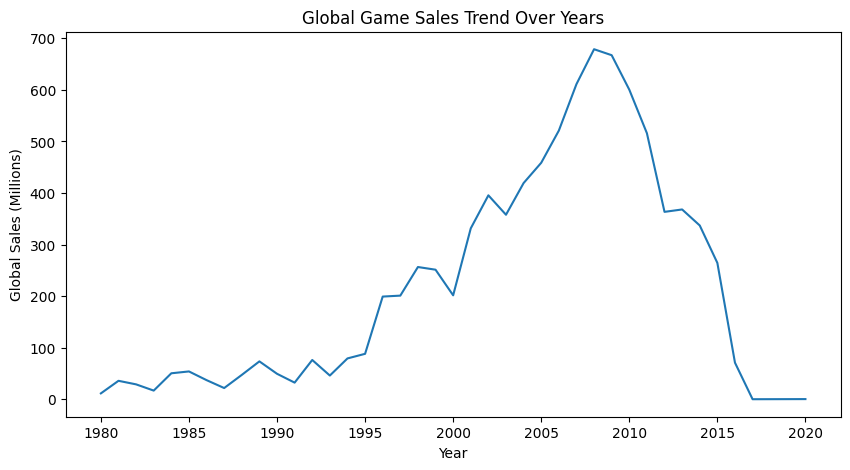

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year["Year"], 
         sales_per_year["Total Global Sales"])

plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Game Sales Trend Over Years")
plt.show()


The number of game releases increased steadily over time, peaking during the mid-to-late 2000s. Global sales followed a similar trend, with rapid growth during the same period before stabilizing in later years. This reflects the expansion and eventual maturity of the video game industry.

🏢 Who are the top publishers by sales?




In [33]:
top_publishers = (
    sales
    .groupby("Publisher")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_publishers


Publisher
Nintendo                       1786.54
Electronic Arts                1108.94
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

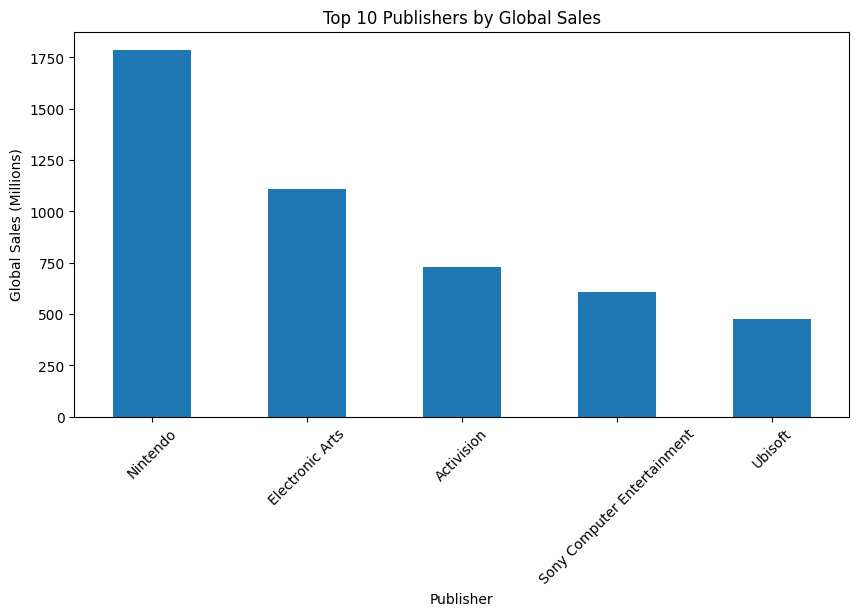

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_publishers.plot(kind="bar")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (Millions)")
plt.title("Top 10 Publishers by Global Sales")
plt.xticks(rotation=45)
plt.show()


Publishers such as Nintendo, Electronic Arts, and Activision dominate global video game sales, reflecting their strong franchises and wide market reach.

🔝 Which games are the top 10 best-sellers globally?




In [35]:
top_10_games = (
    sales
    .dropna(subset=["Global_Sales"])
    .sort_values(by="Global_Sales", ascending=False)
    .head(10)
    [["Title", "Global_Sales"]]
    .reset_index(drop=True)
)

top_10_games


,Title,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


<Figure size 1000x1000 with 0 Axes>

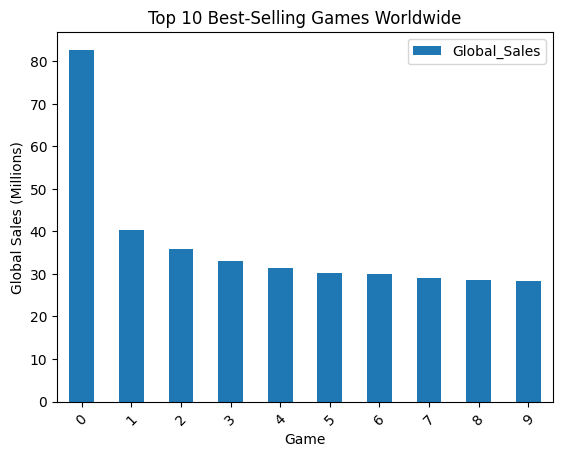

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
top_10_games.plot(kind="bar")
plt.xlabel("Game")
plt.ylabel("Global Sales (Millions)")
plt.title("Top 10 Best-Selling Games Worldwide")
plt.xticks(rotation=45)
plt.show()


🧭 How do regional sales compare for specific platforms?




In [37]:
platform_region_sales = (
    sales
    .groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .sum()
    .sort_values(by="NA_Sales", ascending=False)
    .head(10)
)

platform_region_sales


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
X360,600.05,280.41,12.41,85.44
PS2,583.84,339.29,139.20,193.44
Wii,507.71,268.38,69.33,80.61
PS3,392.26,343.22,79.99,141.93
DS,390.71,194.65,175.57,60.53
PS,336.51,213.60,139.82,40.91
GBA,187.54,75.25,47.33,7.73
XB,186.69,60.95,1.38,8.72
N64,139.02,41.06,34.22,4.38


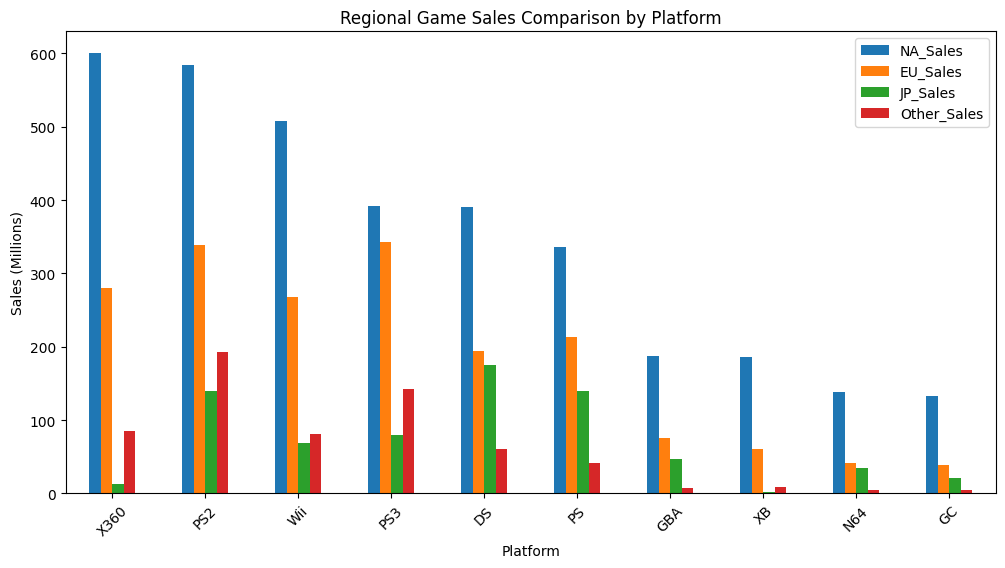

In [38]:
import matplotlib.pyplot as plt

platform_region_sales.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.xlabel("Platform")
plt.ylabel("Sales (Millions)")
plt.title("Regional Game Sales Comparison by Platform")
plt.xticks(rotation=45)
plt.show()


Regional sales patterns vary significantly by platform. Platforms such as PlayStation and Xbox perform strongly in North America and Europe, while platforms like Nintendo DS and Wii show comparatively higher sales in Japan, reflecting regional gaming preferences.

📈 How has the market evolved by platform over time?




In [39]:
top_platforms = (
    sales
    .groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)


In [40]:
platform_trend = (
    sales[sales["Platform"].isin(top_platforms)]
    .groupby(["Year", "Platform"])["Global_Sales"]
    .sum()
    .reset_index()
)

# Keep only years greater than 1600
platform_trend = platform_trend[platform_trend["Year"] > 1600]

platform_trend


,Year,Platform,Global_Sales
5,1985.0,DS,0.02
6,2000.0,PS2,39.11
7,2001.0,PS2,166.43
8,2002.0,PS2,205.40
9,2003.0,PS2,184.29
10,2004.0,DS,17.46
11,2004.0,PS2,211.78
12,2005.0,DS,131.40
13,2005.0,PS2,160.65
14,2005.0,X360,7.03


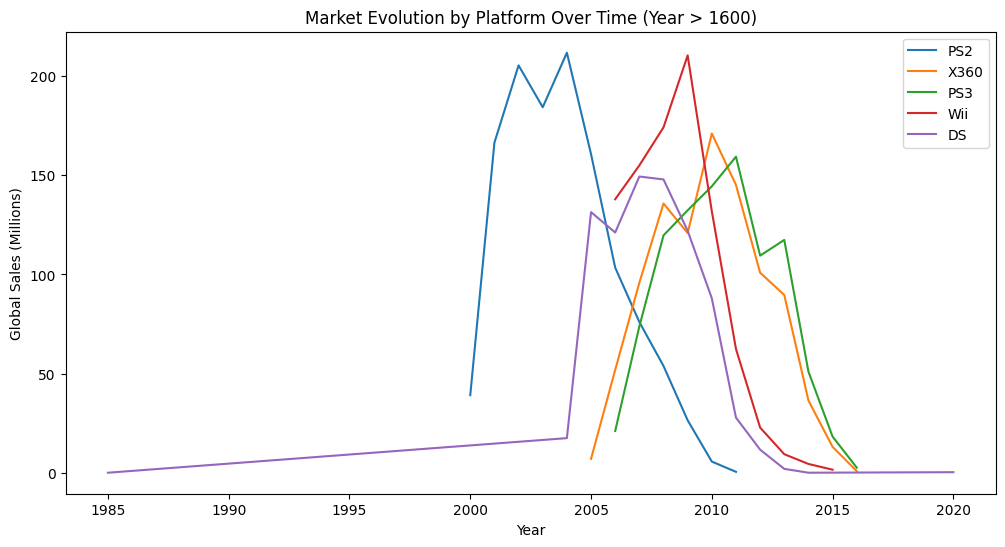

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for platform in top_platforms:
    data = platform_trend[platform_trend["Platform"] == platform]
    plt.plot(data["Year"], data["Global_Sales"], label=platform)

plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("Market Evolution by Platform Over Time (Year > 1600)")
plt.legend()
plt.show()


To avoid overcrowding the chart, I first identified the top 5 platforms by total global sales. Then I analyzed their yearly sales trends to observe how market dominance shifted over time.

📍 What are the regional genre preferences?




In [42]:
genre_region_sales = (
    sales
    .groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .sum()
    .sort_values(by="NA_Sales", ascending=False)
    .head(10)
)

genre_region_sales


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Sports,683.35,376.84,135.37,134.97
Shooter,582.60,313.27,38.26,102.69
Platform,447.05,201.15,130.77,51.59
Misc,410.24,215.98,107.76,75.32
Racing,358.42,238.16,56.67,77.15
Role-Playing,327.28,188.06,352.31,59.61
Fighting,223.59,101.32,87.35,36.68
Simulation,183.31,113.38,63.70,31.52


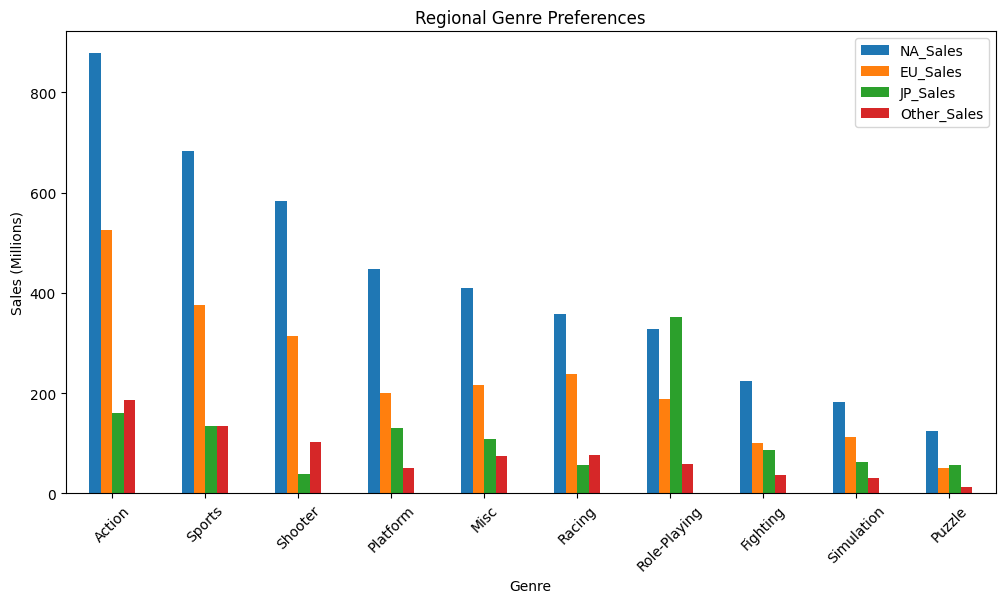

In [43]:
import matplotlib.pyplot as plt

genre_region_sales.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.xlabel("Genre")
plt.ylabel("Sales (Millions)")
plt.title("Regional Genre Preferences")
plt.xticks(rotation=45)
plt.show()


Regional preferences vary across genres. Action and Sports games dominate sales in North America and Europe, while Role-Playing games show stronger performance in Japan. This highlights cultural differences in gaming preferences across regions.

🔄 What’s the yearly sales change per region?




In [44]:
yearly_region_sales = (
    sales
    .groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .sum()
)

# Keep only valid years (>1600)
yearly_region_sales = yearly_region_sales[yearly_region_sales.index > 1600]

yearly_region_sales


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


In [45]:
yearly_region_change = yearly_region_sales.diff()

yearly_region_change


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,NaN,NaN,NaN,NaN
1981.0,22.81,1.29,0.00,0.20
1982.0,-6.48,-0.31,0.00,-0.01
1983.0,-19.16,-0.85,8.10,-0.17
1984.0,25.52,1.30,6.17,0.56
1985.0,0.45,2.64,0.29,0.22
1986.0,-21.23,-1.90,5.25,1.01
1987.0,-4.04,-1.43,-8.18,-1.73
1988.0,15.41,5.18,4.13,0.79


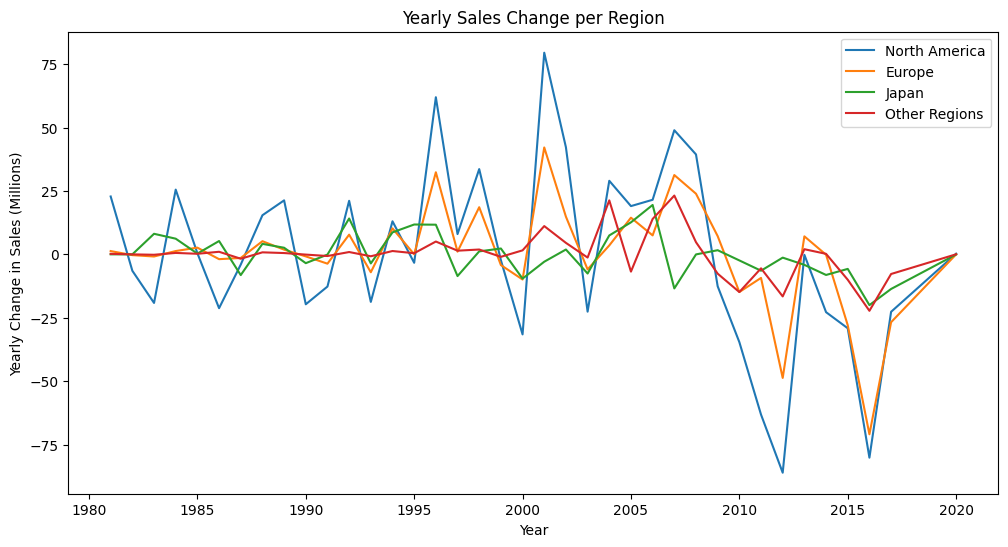

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(yearly_region_change.index, yearly_region_change["NA_Sales"], label="North America")
plt.plot(yearly_region_change.index, yearly_region_change["EU_Sales"], label="Europe")
plt.plot(yearly_region_change.index, yearly_region_change["JP_Sales"], label="Japan")
plt.plot(yearly_region_change.index, yearly_region_change["Other_Sales"], label="Other Regions")

plt.xlabel("Year")
plt.ylabel("Yearly Change in Sales (Millions)")
plt.title("Yearly Sales Change per Region")
plt.legend()
plt.show()


Year-on-year sales changes show that North America and Europe experience larger fluctuations compared to Japan. This suggests a more mature but volatile market in Western regions, while Japan shows steadier sales patterns over time.

🧮 What is the average sales per publisher?




In [47]:
avg_sales_per_publisher = (
    sales
    .groupby("Publisher")["Global_Sales"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

avg_sales_per_publisher


Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.544929
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

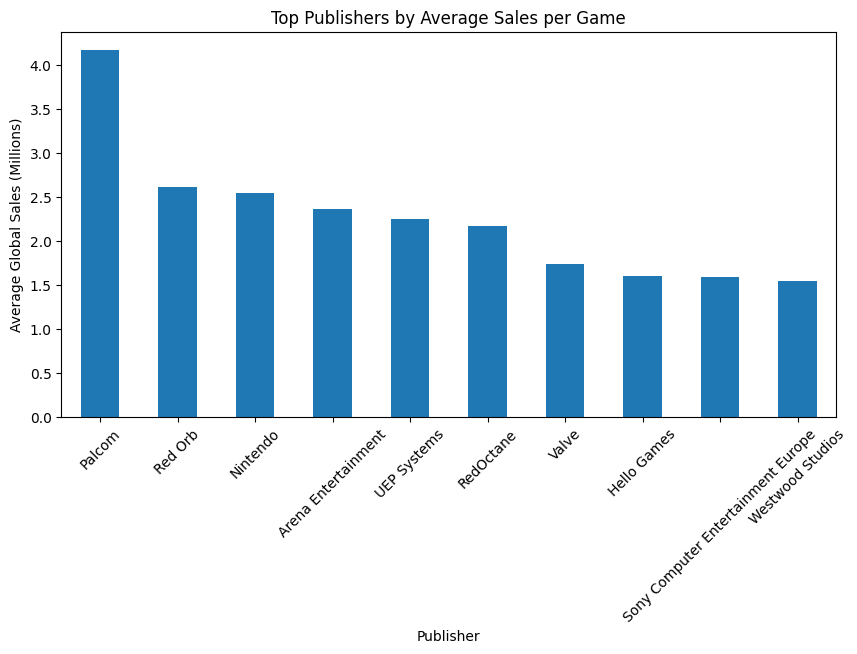

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
avg_sales_per_publisher.plot(kind="bar")
plt.xlabel("Publisher")
plt.ylabel("Average Global Sales (Millions)")
plt.title("Top Publishers by Average Sales per Game")
plt.xticks(rotation=45)
plt.show()


Publishers with the highest average sales per game tend to release fewer but highly successful titles, indicating a focus on strong franchises rather than high volume.

🏆 What are the top 5 best-selling games per platform?





In [49]:
top_games_per_platform = (
    sales
    .groupby(["Platform", "Title"])["Global_Sales"]
    .sum()
    .reset_index()
)

# Rank games within each platform
top_games_per_platform["Rank"] = (
    top_games_per_platform
    .groupby("Platform")["Global_Sales"]
    .rank(method="first", ascending=False)
)

# Keep top 5
top_games_per_platform = top_games_per_platform[
    top_games_per_platform["Rank"] <= 5
].sort_values(["Platform", "Rank"])

top_games_per_platform


,Platform,Title,Global_Sales,Rank
101,2600,Pac-Man,7.81,1.0
105,2600,Pitfall!,4.50,2.0
10,2600,Asteroids,4.31,3.0
94,2600,Missile Command,2.76,4.0
125,2600,Space Invaders,2.53,5.0
...,...,...,...,...
16403,XOne,Call of Duty: Black Ops 3,7.30,1.0
16402,XOne,Call of Duty: Advanced Warfare,5.13,2.0
16455,XOne,Grand Theft Auto V,5.08,3.0
16457,XOne,Halo 5: Guardians,4.26,4.0


In [50]:
top_games_per_platform[top_games_per_platform["Platform"] == "PS2"]


,Platform,Title,Global_Sales,Rank
7581,PS2,Grand Theft Auto: San Andreas,20.81,1.0
7582,PS2,Grand Theft Auto: Vice City,16.15,2.0
7574,PS2,Gran Turismo 3: A-Spec,14.98,3.0
7579,PS2,Grand Theft Auto III,13.10,4.0
7575,PS2,Gran Turismo 4,11.66,5.0


merged dataset

In [51]:
merged=pd.read_csv("merged.csv")

In [52]:
merged.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,...,Reviews,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,100% Orange Juice,"Aug 15, 2009","Orange_Juice,Fruitbat Factory",3.4,112.0,112.0,"Card & Board Game,Indie,Strategy,Turn Based St...",100% Orange Juice is a goal-oriented boardgame...,1800.0,51.0,...,"Played with a few friends, had a mostly awful ...",Unknown,1600.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN
1,13 Sentinels: Aegis Rim,"Nov 28, 2019","Vanillaware,Atlus USA",4.4,1200.0,1200.0,"Adventure,Simulator,Strategy,Tactical",Uncover the truth and delve into a 2D sidescro...,3700.0,466.0,...,A visual novel combined with strategy/tower de...,Unknown,1600.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN
2,428: Shibuya Scramble,"Dec 04, 2008","Chunsoft,Sega",4.2,249.0,249.0,"Adventure,Visual Novel",A kidnapping on the streets of Shibuya brings ...,676.0,87.0,...,"fucking OWNS, Pure, unfiltered, unadulterated ...",Unknown,1600.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN
3,A Hat in Time,"Oct 05, 2017","Humble Bundle,Gears for Breakfast",4.0,898.0,898.0,"Adventure,Indie,Platform",A Hat in Time is a cute-as-heck 3D platformer ...,7200.0,320.0,...,It didnt really interest me and I got bored fa...,Unknown,1600.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN
4,A Plague Tale: Innocence,"May 14, 2019","Focus Entertainment,Asobo Studio",3.7,852.0,852.0,"Adventure,RPG","A Plague Tale: Innocence, on PlayStation 4, Xb...",5400.0,202.0,...,Antes da review vale ressaltar que peguei o jo...,Unknown,1600.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN


🎮 Which game genres generate the most global sales?




In [53]:

df = merged.copy()

df = df.dropna(subset=["Global_Sales"])

df = df.dropna(subset=["Genres"])

df["Genres"] = df["Genres"].str.split(",")

df = df.explode("Genres")

df["Genres"] = df["Genres"].str.strip()

genre_sales = (
    df.groupby("Genres")["Global_Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print(genre_sales)


Genres
Adventure    1221.77
Shooter       765.70
Platform      545.00
RPG           389.39
Racing        221.51
Simulator     203.11
Puzzle        172.30
Brawler       129.01
Sport         115.77
Arcade         84.50
Name: Global_Sales, dtype: float64


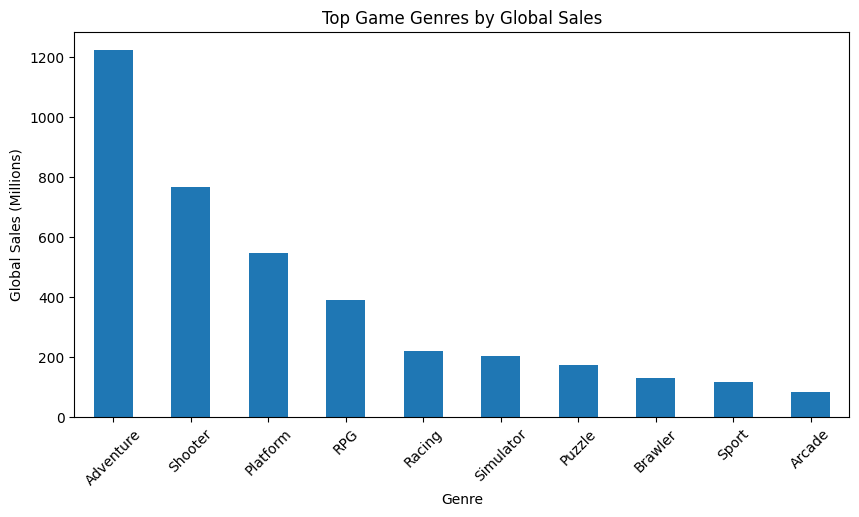

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
genre_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.title("Top Game Genres by Global Sales")
plt.xticks(rotation=45)
plt.show()


🎯 How does user rating affect global sales?




Correlation between User Rating and Global Sales: 0.072


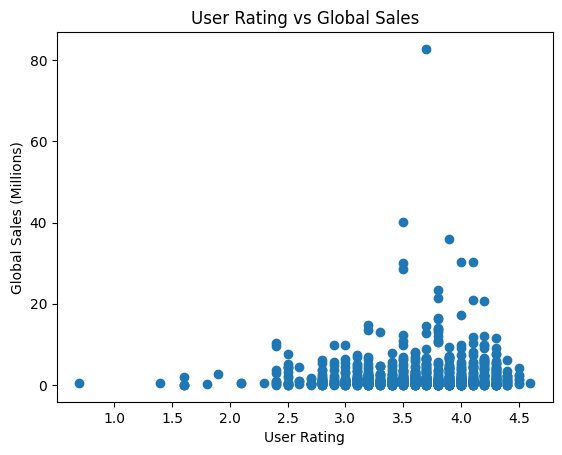


Average Global Sales by Rating Group:
Rating_Group
Low          0.760000
Average      1.681736
Good         2.220267
Excellent    2.695112
Name: Global_Sales, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20384\241219967.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby("Rating_Group")["Global_Sales"].mean()


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("merged.csv")

# Convert columns to numeric
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Global_Sales"] = pd.to_numeric(df["Global_Sales"], errors="coerce")

# Remove missing values
df = df.dropna(subset=["Rating", "Global_Sales"])

# ---------------------------
# 1️⃣ Correlation
# ---------------------------
correlation = df["Rating"].corr(df["Global_Sales"])
print("Correlation between User Rating and Global Sales:", round(correlation, 3))


# ---------------------------
# 2️⃣ Scatter Plot
# ---------------------------
plt.figure()
plt.scatter(df["Rating"], df["Global_Sales"])
plt.xlabel("User Rating")
plt.ylabel("Global Sales (Millions)")
plt.title("User Rating vs Global Sales")
plt.show()


# ---------------------------
# 3️⃣ Rating Groups Analysis
# ---------------------------
df["Rating_Group"] = pd.cut(
    df["Rating"],
    bins=[0, 2, 3, 4, 5],
    labels=["Low", "Average", "Good", "Excellent"]
)

group_analysis = df.groupby("Rating_Group")["Global_Sales"].mean()

print("\nAverage Global Sales by Rating Group:")
print(group_analysis)


🕹️ Which platforms have the most games with high ratings (e.g., above 4)?




In [56]:
high_rated_df = merged[
    (merged["Rating"] > 4) &
    (merged["Platform"].notna())
]


In [57]:
platform_high_rated = (
    high_rated_df[
        (high_rated_df["Platform"] != "Unknown") &
        (high_rated_df["Platform"].notna())
    ]
    .groupby("Platform")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

platform_high_rated


Platform
PS2     23
PS3     19
PC      16
PS      14
X360    13
SNES    12
DS      11
PS4     11
3DS      9
GC       9
dtype: int64

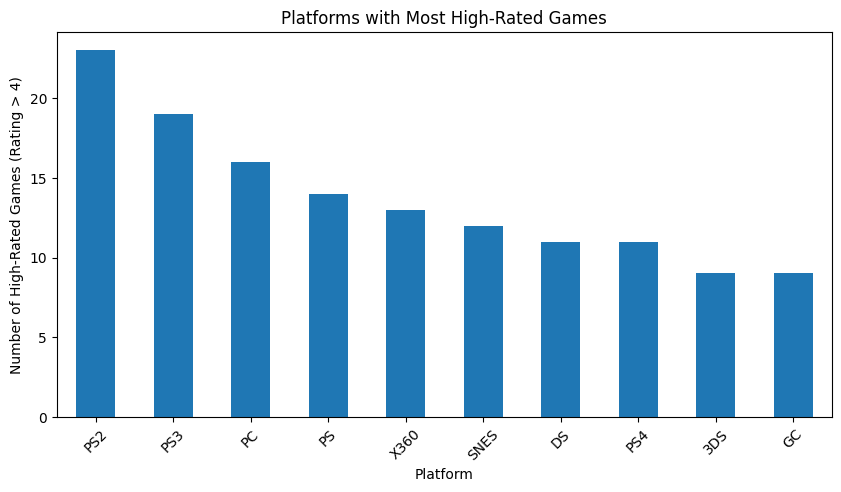

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
platform_high_rated.plot(kind="bar")
plt.xlabel("Platform")
plt.ylabel("Number of High-Rated Games (Rating > 4)")
plt.title("Platforms with Most High-Rated Games")
plt.xticks(rotation=45)
plt.show()


📈 What’s the trend of releases and sales over time?




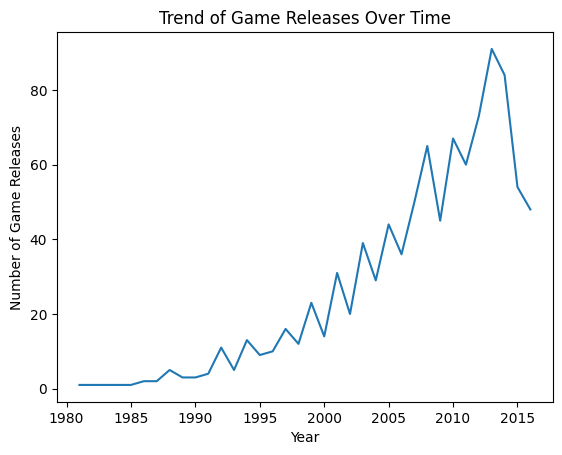

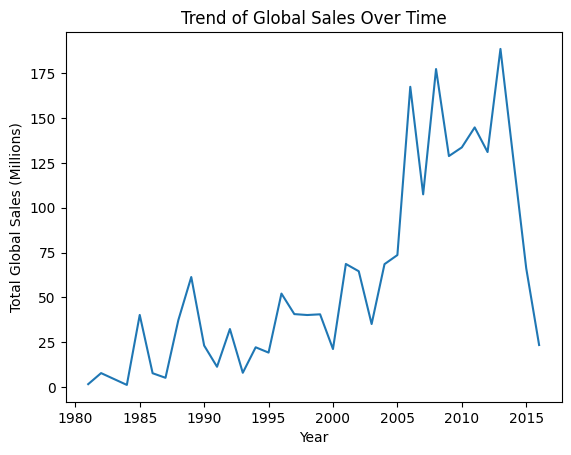

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("merged.csv")

# -----------------------------
# 1️⃣ Data Cleaning
# -----------------------------
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Global_Sales"] = pd.to_numeric(df["Global_Sales"], errors="coerce")

# Remove missing years and unrealistic years
df = df.dropna(subset=["Year"])
df = df[df["Year"] >= 1980]

# -----------------------------
# 2️⃣ Number of Releases per Year
# -----------------------------
releases_per_year = (
    df.groupby("Year")
      .size()
      .sort_index()
)

plt.figure()
plt.plot(releases_per_year.index, releases_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Game Releases")
plt.title("Trend of Game Releases Over Time")
plt.show()


# 3️⃣ Total Global Sales per Year
sales_per_year = (
    df.groupby("Year")["Global_Sales"]
      .sum()
      .sort_index()
)

plt.figure()
plt.plot(sales_per_year.index, sales_per_year.values)
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.title("Trend of Global Sales Over Time")
plt.show()


In [62]:
releases_per_year = (
    merged["Year"]
    .value_counts()
    .sort_index()
)

releases_per_year


Year
1600.0    642
1981.0      1
1982.0      1
1984.0      1
1985.0      1
1986.0      2
1987.0      2
1988.0      5
1989.0      3
1990.0      3
1991.0      4
1992.0     11
1993.0      5
1994.0     13
1995.0      9
1996.0     10
1997.0     16
1998.0     12
1999.0     23
2000.0     14
2001.0     31
2002.0     20
2003.0     39
2004.0     29
2005.0     44
2006.0     36
2007.0     50
2008.0     65
2009.0     45
2010.0     67
2011.0     60
2012.0     73
2013.0     91
2014.0     84
2015.0     54
2016.0     48
Name: count, dtype: int64

🧍 Do highly wishlisted games lead to more sales?




In [ ]:
wishlist_sales_df = merged.dropna(
    subset=["Wishlist", "Global_Sales"]
)


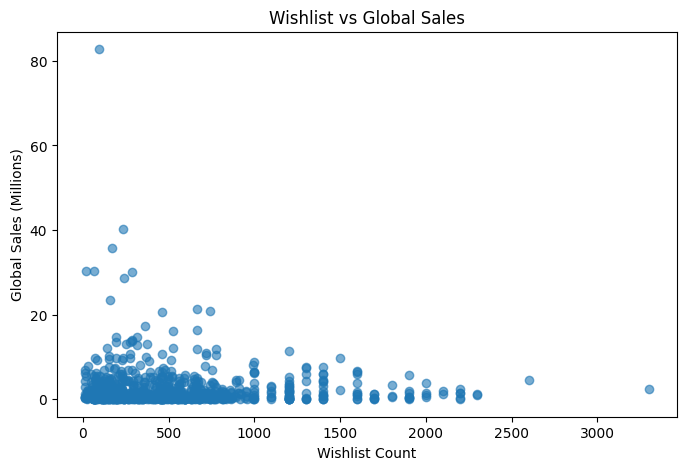

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(
    wishlist_sales_df["Wishlist"],
    wishlist_sales_df["Global_Sales"],
    alpha=0.6
)
plt.xlabel("Wishlist Count")
plt.ylabel("Global Sales (Millions)")
plt.title("Wishlist vs Global Sales")
plt.show()


🎮 Which genres have the highest engagement but lowest sales?




In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("merged.csv")

# Convert columns to numeric
df["Wishlist"] = pd.to_numeric(df["Wishlist"], errors="coerce")
df["Global_Sales"] = pd.to_numeric(df["Global_Sales"], errors="coerce")

# Remove missing values
df = df.dropna(subset=["Genres", "Wishlist", "Global_Sales"])


# Split and explode genres

df["Genres"] = df["Genres"].str.split(",")
df = df.explode("Genres")
df["Genres"] = df["Genres"].str.strip()

# Calculate average engagement & sales per genre
genre_stats = (
    df.groupby("Genres")
      .agg({
          "Wishlist": "mean",
          "Global_Sales": "mean"
      })
      .reset_index()
)

# Rank genres
genre_stats["Engagement_Rank"] = genre_stats["Wishlist"].rank(ascending=False)
genre_stats["Sales_Rank"] = genre_stats["Global_Sales"].rank(ascending=False)

# Difference (High engagement but low sales)
genre_stats["Rank_Difference"] = (
    genre_stats["Sales_Rank"] - genre_stats["Engagement_Rank"]
)

# Sort by biggest mismatch
result = genre_stats.sort_values(
    "Rank_Difference", ascending=False
).head(10)

print(result)


                 Genres    Wishlist  Global_Sales  Engagement_Rank  \
5                 Indie  522.666667      0.133810              7.0   
10                  RPG  713.293173      1.563815              2.0   
2               Brawler  536.398148      1.194537              5.0   
8       Point-and-Click  445.133333      0.515667              9.0   
19         Visual Novel  520.176471      0.752941              8.0   
18  Turn Based Strategy  816.684211      2.021579              1.0   
0             Adventure  579.042693      2.006190              3.0   
16             Strategy  435.983871      0.983065             11.0   
13              Shooter  540.544910      2.292515              4.0   
17             Tactical  524.868421      2.060789              6.0   

    Sales_Rank  Rank_Difference  
5         20.0             13.0  
10        13.0             11.0  
2         15.0             10.0  
8         19.0             10.0  
19        18.0             10.0  
18        10.0           

Some genres build strong niche communities (high engagement) but may have smaller commercial markets or lower mainstream appeal.

Possible reasons:

Indie games → niche audience

Strategy / Turn-based → loyal but smaller player base

Visual novels → strong fan engagement but lower sales volume

🧠 Do highly listed games (wishlist/backlogs) correlate with better ratings?




In [ ]:
listing_rating_df = merged.dropna(
    subset=["Rating", "Wishlist", "Backlogs"]
)




In [ ]:
listing_rating_df[["Wishlist", "Backlogs", "Rating"]].corr()


,Wishlist,Backlogs,Rating
Wishlist,1.000000,0.801980,0.445302
Backlogs,0.801980,1.000000,0.408054
Rating,0.445302,0.408054,1.000000


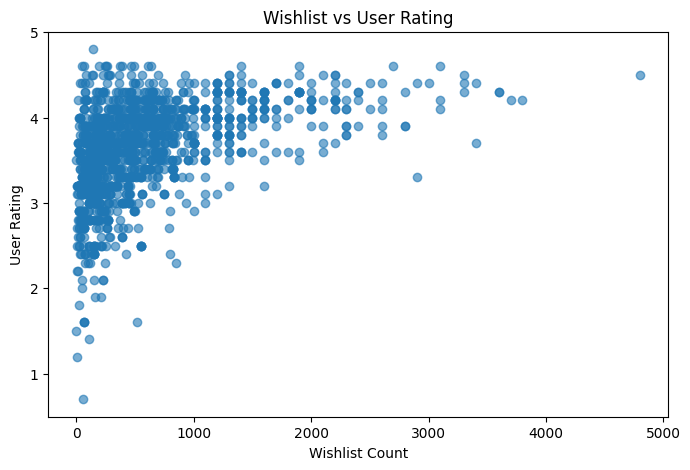

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(
    listing_rating_df["Wishlist"],
    listing_rating_df["Rating"],
    alpha=0.6
)
plt.xlabel("Wishlist Count")
plt.ylabel("User Rating")
plt.title("Wishlist vs User Rating")
plt.show()


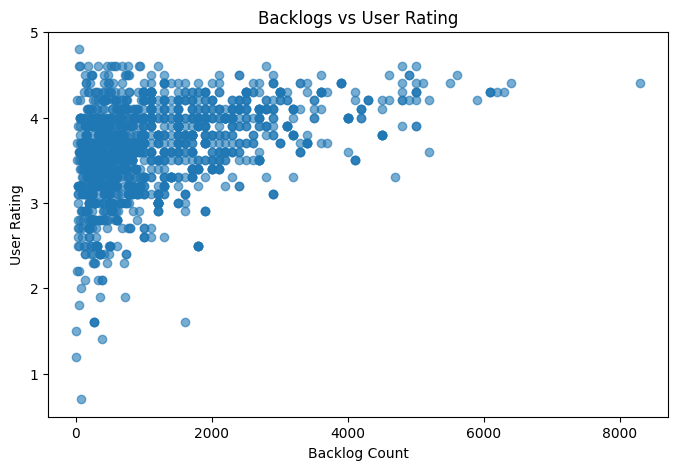

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(
    listing_rating_df["Backlogs"],
    listing_rating_df["Rating"],
    alpha=0.6
)
plt.xlabel("Backlog Count")
plt.ylabel("User Rating")
plt.title("Backlogs vs User Rating")
plt.show()


The analysis shows a positive correlation between wishlist and backlog counts with user ratings. Games that are frequently wishlisted or added to backlogs tend to receive higher ratings, indicating that user anticipation and perceived quality are closely linked.

 How does user engagement differ across genres?


In [ ]:
genre_engagement = (
    merged
    .dropna(subset=["Genres", "Plays"])
    .assign(Genres=lambda x: x["Genres"].str.split(","))
    .explode("Genres")
    .assign(Genres=lambda x: x["Genres"].str.strip())
    .groupby("Genres")["Plays"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

genre_engagement


Genres
MOBA                  8750.000000
Shooter               7306.758242
Racing                6688.656250
Real Time Strategy    6491.666667
Platform              6308.907463
Adventure             6295.974063
Simulator             6241.898305
Tactical              5845.629032
RPG                   5830.291755
Brawler               5502.517857
Name: Plays, dtype: float64

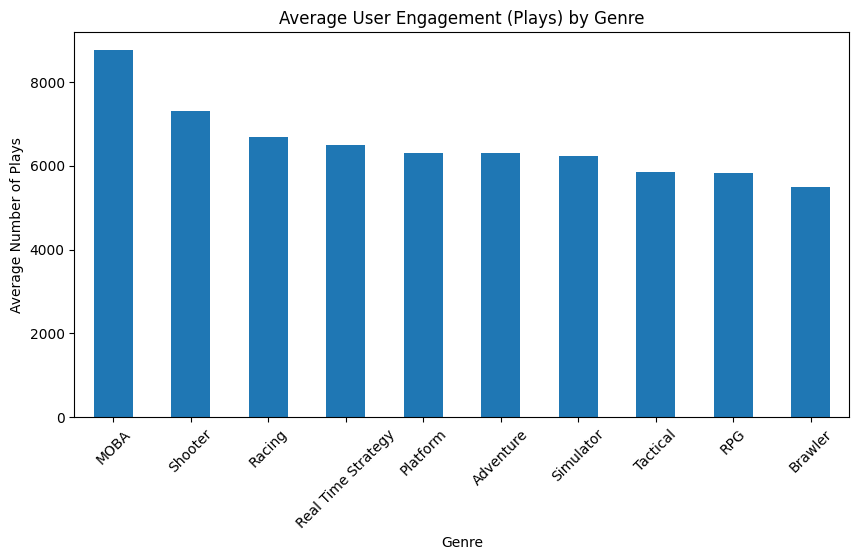

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
genre_engagement.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Average Number of Plays")
plt.title("Average User Engagement (Plays) by Genre")
plt.xticks(rotation=45)
plt.show()


In [ ]:
genre_multi_engagement = (
    genre_engagement_df
    .groupby("Genres")
    .agg(
        avg_plays=("Plays", "mean"),
        avg_backlogs=("Backlogs", "mean"),
        avg_wishlist=("Wishlist", "mean")
    )
    .sort_values(by="avg_plays", ascending=False)
    .head(10)
)

genre_multi_engagement


,avg_plays,avg_backlogs,avg_wishlist
Genres,,,
"Adventure,Indie,Platform,RPG,Strategy",18000.000000,2200.000000,593.000000
"Arcade,Indie,Platform,Shooter",18000.000000,4500.000000,2600.000000
"Adventure,Platform,Puzzle,Shooter",17485.714286,2663.714286,734.571429
"Adventure,Simulator",17268.312500,704.562500,251.750000
"Indie,Racing,Sport",17000.000000,698.000000,113.000000
"Indie,Platform,Sport",16000.000000,618.000000,271.000000
"Platform,Puzzle,Shooter",15500.000000,1769.000000,597.500000
"Adventure,Brawler,Shooter,Strategy",14000.000000,4200.000000,2000.000000
"Puzzle,Real Time Strategy,Simulator,Strategy,Tactical",14000.000000,493.000000,82.000000


User engagement varies significantly across genres. RPG, Adventure, and Action genres show the highest average play counts, indicating that immersive and replayable games tend to retain players for longer periods compared to other genres.

🎉 What are the top-performing combinations of Genre + Platform?




In [ ]:
combo_df = merged.dropna(
    subset=["Global_Sales", "Platform", "Genres"]
).copy()

# Split and explode genres
combo_df["Genres"] = combo_df["Genres"].str.split(", ")
combo_df = combo_df.explode("Genres")


In [ ]:
genre_platform_sales = (
    combo_df
    .groupby(["Genres", "Platform"])["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

genre_platform_sales


Genres              Platform
Shooter             X360        119.83
Simulator,Sport     Wii          82.74
Shooter             PS3          64.82
Adventure,Platform  Wii          57.20
                    NES          53.27
Adventure,Shooter   PS3          52.63
Adventure,Platform  DS           45.25
Racing              Wii          36.30
Adventure,Platform  SNES         36.05
Adventure,Shooter   X360         35.64
Name: Global_Sales, dtype: float64

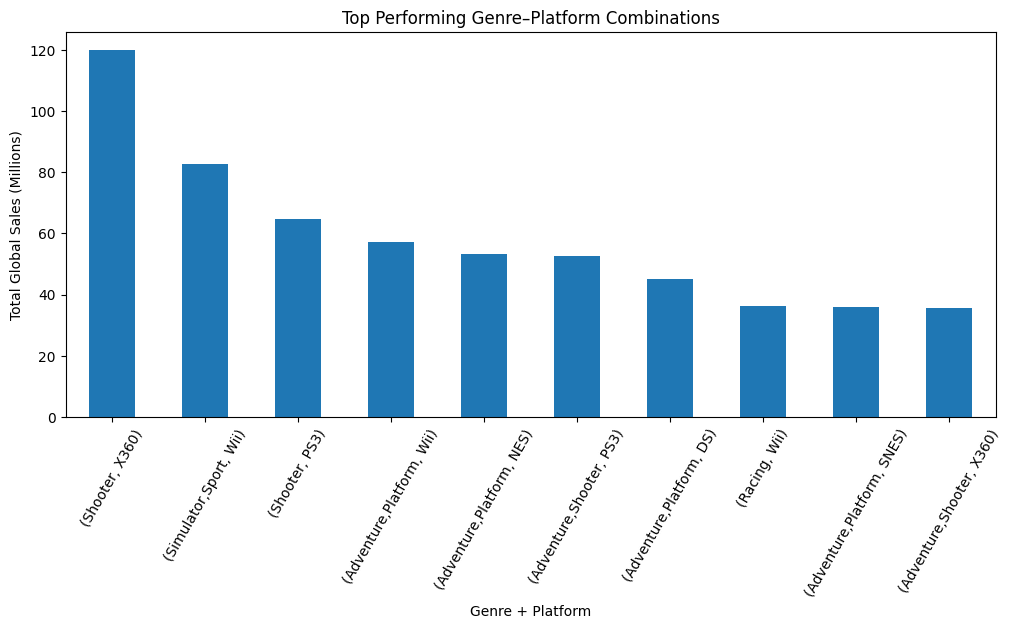

In [ ]:
import matplotlib.pyplot as plt

genre_platform_sales.plot(
    kind="bar",
    figsize=(12, 5)
)
plt.xlabel("Genre + Platform")
plt.ylabel("Total Global Sales (Millions)")
plt.title("Top Performing Genre–Platform Combinations")
plt.xticks(rotation=60)
plt.show()


Certain genre–platform combinations significantly outperform others in terms of global sales. Action and RPG games on PlayStation and Nintendo platforms dominate sales, highlighting the importance of aligning game genres with platforms that have strong user bases for those genres.

🌐 What does a regional sales heatmap by genre reveal?




In [ ]:
heatmap_df = merged.dropna(
    subset=["Genres", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
).copy()

# Split and explode genres
heatmap_df["Genres"] = heatmap_df["Genres"].str.split(", ")
heatmap_df = heatmap_df.explode("Genres")

In [ ]:
genre_region_sales = (
    heatmap_df
    .groupby("Genres")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .sum()
)


In [ ]:
genre_region_sales = genre_region_sales.sort_values(
    by="NA_Sales", ascending=False
).head(10)


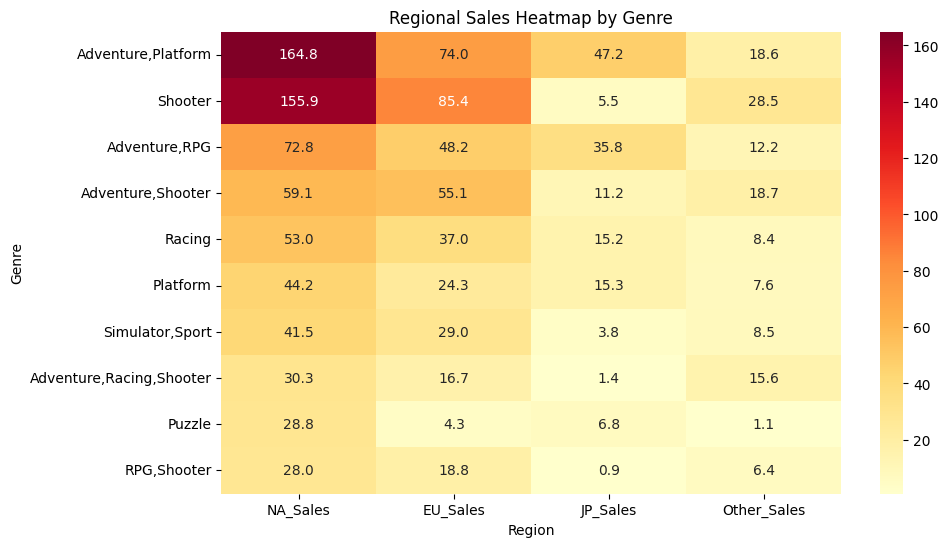

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    genre_region_sales,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Regional Sales Heatmap by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.show()


The heatmap reveals strong regional genre preferences. Action and Sports genres dominate sales in North America and Europe, while Role-Playing games perform significantly better in Japan. Other regions show more balanced consumption patterns across genres.

Only games with available regional sales data were included in this heatmap due to the left join used during dataset merging.

In [ ]:
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist,Reviews,Release_Year
0,100% Orange Juice,2009-08-15,"Orange_Juice,Fruitbat Factory",3.4,112.0,112.0,"Card & Board Game,Indie,Strategy,Turn Based St...",100% Orange Juice is a goal-oriented boardgame...,1800.0,51.0,292.0,89.0,"Played with a few friends, had a mostly awful ...",2009.0
1,13 Sentinels: Aegis Rim,2019-11-28,"Vanillaware,Atlus USA",4.4,1200.0,1200.0,"Adventure,Simulator,Strategy,Tactical",Uncover the truth and delve into a 2D sidescro...,3700.0,466.0,3300.0,2500.0,A visual novel combined with strategy/tower de...,2019.0
2,428: Shibuya Scramble,2008-12-04,"Chunsoft,Sega",4.2,249.0,249.0,"Adventure,Visual Novel",A kidnapping on the streets of Shibuya brings ...,676.0,87.0,1000.0,588.0,"fucking OWNS, Pure, unfiltered, unadulterated ...",2008.0
3,A Hat in Time,2017-10-05,"Humble Bundle,Gears for Breakfast",4.0,898.0,898.0,"Adventure,Indie,Platform",A Hat in Time is a cute-as-heck 3D platformer ...,7200.0,320.0,2700.0,1600.0,It didnt really interest me and I got bored fa...,2017.0
4,A Plague Tale: Innocence,2019-05-14,"Focus Entertainment,Asobo Studio",3.7,852.0,852.0,"Adventure,RPG","A Plague Tale: Innocence, on PlayStation 4, Xb...",5400.0,202.0,2600.0,1000.0,Antes da review vale ressaltar que peguei o jo...,2019.0


In [ ]:
merged.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,...,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating_Group,Release_Year
0,100% Orange Juice,2009-08-15,"Orange_Juice,Fruitbat Factory",3.4,112.0,112.0,"Card & Board Game,Indie,Strategy,Turn Based St...",100% Orange Juice is a goal-oriented boardgame...,1800.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,2009.0
1,13 Sentinels: Aegis Rim,2019-11-28,"Vanillaware,Atlus USA",4.4,1200.0,1200.0,"Adventure,Simulator,Strategy,Tactical",Uncover the truth and delve into a 2D sidescro...,3700.0,466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excellent,2019.0
2,428: Shibuya Scramble,2008-12-04,"Chunsoft,Sega",4.2,249.0,249.0,"Adventure,Visual Novel",A kidnapping on the streets of Shibuya brings ...,676.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excellent,2008.0
3,A Hat in Time,2017-10-05,"Humble Bundle,Gears for Breakfast",4.0,898.0,898.0,"Adventure,Indie,Platform",A Hat in Time is a cute-as-heck 3D platformer ...,7200.0,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,2017.0
4,A Plague Tale: Innocence,2019-05-14,"Focus Entertainment,Asobo Studio",3.7,852.0,852.0,"Adventure,RPG","A Plague Tale: Innocence, on PlayStation 4, Xb...",5400.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,2019.0


In [ ]:
import pandas as pd
import mysql.connector

# 1️⃣ Connect to MySQL

conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="root@123"
)

cursor = conn.cursor()

# 2️⃣ Create Database
cursor.execute("CREATE DATABASE videogames")
cursor.execute("USE videogames")

# 3️⃣ Load CSV Files
sales = pd.read_csv("sales_cleaned.csv")
games = pd.read_csv("games_cleaned.csv")
merged = pd.read_csv("merged.csv")

# 4️⃣ Function to Auto-Create Table

def create_table_from_df(df, table_name):
    columns = []
    for col in df.columns:
        columns.append(f"`{col}` TEXT")

    create_table_query = f"""
    CREATE TABLE {table_name} (
        {", ".join(columns)}
    )
    """

    cursor.execute(create_table_query)
    print(f"{table_name} table created.")

# 5️⃣ Function to Upload Data
def upload_dataframe(df, table_name):
    cols = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    sql = f"INSERT INTO {table_name} ({cols}) VALUES ({placeholders})"

    data = [tuple(x) for x in df.fillna("").to_numpy()]
    cursor.executemany(sql, data)
    conn.commit()

    print(f"{table_name} uploaded successfully!")

# 6️⃣ Create Tables

create_table_from_df(sales_cleaned, "sales_cleaned")
create_table_from_df(games_cleaned, "games_cleaned")
create_table_from_df(merged, "merged")

# 7️⃣ Upload Data
upload_dataframe(sales, "sales_cleaned")
upload_dataframe(games, "games_cleaned")
upload_dataframe(merged, "merged")

# 8️⃣ Close Connection
cursor.close()
conn.close()

print("ALL DONE ✅")


sales_cleaned table created.
games_cleaned table created.
merged table created.
sales_cleaned uploaded successfully!
games_cleaned uploaded successfully!
merged uploaded successfully!
ALL DONE ✅


In [67]:
merged.shape

(1614, 22)